# **PCA**

Principal Component Analysis (PCA) is an unsupervised machine learning technique that reduces the number of features (dimensions) in a dataset by transforming the original variables into a new set of uncorrelated variables called principal components. PCA identifies the directions (principal components) that explain the most variance (information) in the data, then uses the most significant ones to create a lower-dimensional representation, making data simpler, faster to process, easier to visualize, and helping to prevent model overfitting.

* PCA is nothing but, creating new features from the linear combination of existing features
* PCA will extract the eigen vectors and eigen values of the given data (from covariance matrix), and projects the data onto the major eigen vecotors(desired count), in the descending order of the eigen values
* In this way, the dimention of the data points is reduced to desired dimention

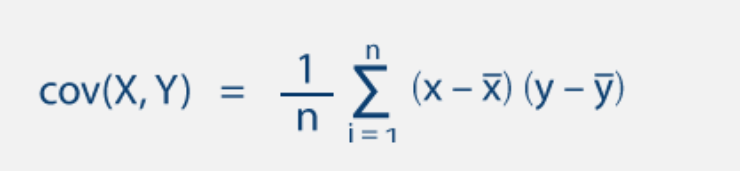

### **Implementation**

In [1]:
# importing libraries

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
# creating a data
data = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])
X = data.values

In [3]:
# splitting the data
x_trian, x_test = train_test_split(X, test_size=0.2, random_state=42)

In [4]:
# feature scaling (maked data to '0' mean, '1' std)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_trian)
x_test_scaled = scaler.transform(x_test)

### without PCA function

In [ ]:
# getting the covariance matrix
cov_mat = np.cov(x_train_scaled.T)

In [11]:
print("The covariance matrix is:\n")
print(cov_mat)
print("\nShape of covariance matrix is", cov_mat.shape)

The covariance matrix is:

[[ 1.01265823  0.0090063   0.04833661 -0.1523019  -0.19411218  0.04570375
  -0.03429763  0.31775803 -0.01768551  0.08680047]
 [ 0.0090063   1.01265823 -0.11548024 -0.00346484 -0.06365583  0.24374569
  -0.16951013  0.06517537 -0.10315923  0.24655043]
 [ 0.04833661 -0.11548024  1.01265823 -0.03415993 -0.08470079  0.09475127
   0.15095473 -0.00476491  0.19819956  0.07281981]
 [-0.1523019  -0.00346484 -0.03415993  1.01265823  0.1987177  -0.12024852
   0.01441467 -0.27045321  0.11004228 -0.21106509]
 [-0.19411218 -0.06365583 -0.08470079  0.1987177   1.01265823 -0.19698407
  -0.15004312 -0.17894851  0.08526359 -0.09023486]
 [ 0.04570375  0.24374569  0.09475127 -0.12024852 -0.19698407  1.01265823
   0.04758373  0.13411777  0.09801457  0.24099662]
 [-0.03429763 -0.16951013  0.15095473  0.01441467 -0.15004312  0.04758373
   1.01265823 -0.00776983  0.05798866 -0.16777255]
 [ 0.31775803  0.06517537 -0.00476491 -0.27045321 -0.17894851  0.13411777
  -0.00776983  1.0126582

In [12]:
# getting the eigen vals and eigen vectors of cov matrix
eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

In [15]:
print("Eigne vals shape:", eig_vals.shape)
print("Eigen vectors shape:", eig_vecs.shape)
print("\nEigen values are:\n", eig_vals)
print("\nEigen vectors:\n", eig_vecs)

Eigne vals shape: (10,)
Eigen vectors shape: (10, 10)

Eigen values are:
 [0.61838693 0.62220747 0.65976499 0.72872686 0.80216302 0.9104139
 1.06169952 1.298981   1.45076011 1.97347847]

Eigen vectors:
 [[ 0.01742154  0.54093874  0.11214372 -0.04402763 -0.23781082 -0.51586597
   0.36922239  0.30237076 -0.14482395 -0.34809225]
 [-0.63434022  0.01986467  0.03808797  0.23530846 -0.15202506 -0.26886535
  -0.28015927 -0.30832296  0.44730049 -0.26714589]
 [-0.11209438 -0.0753324  -0.30120273  0.35913824 -0.55844001  0.22563084
   0.20072494 -0.3148137  -0.50519218 -0.0683717 ]
 [ 0.41699517 -0.28897798  0.14162546  0.17449596 -0.28037579 -0.62482471
  -0.085877   -0.21739961  0.06760779  0.40481524]
 [ 0.01158425  0.38030317 -0.05964664  0.57996179  0.32623436  0.08922215
   0.42127512 -0.1258359   0.26326774  0.37190745]
 [ 0.42207636  0.27899005 -0.45206131 -0.01780972  0.30510235 -0.13812999
  -0.28584726 -0.4553059  -0.0574899  -0.36722601]
 [-0.0967748   0.20186958  0.46745415  0.362434

* The covariance matrix is always symmetric matrix
* so, we get 10 eigen values and 10 eigen vectors

In [16]:
# sorting eigvals, eigvecs
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

In [17]:
# selecting desired number of principle components
n_components = 2
eig_vecs_subset = eig_vecs[:, :n_components]

In [20]:
print("Eigen values:", eig_vals[:n_components])
print("Eigen vectors:\n", eig_vecs_subset)

Eigen values: [1.97347847 1.45076011]
Eigen vectors:
 [[-0.34809225 -0.14482395]
 [-0.26714589  0.44730049]
 [-0.0683717  -0.50519218]
 [ 0.40481524  0.06760779]
 [ 0.37190745  0.26326774]
 [-0.36722601 -0.0574899 ]
 [ 0.05775283 -0.54636087]
 [-0.43973501 -0.06416708]
 [ 0.09450916 -0.32587505]
 [-0.40013803  0.19421945]]


In [26]:
# project data onto scaled components
x_train_pca = np.dot(x_train_scaled, eig_vecs_subset)
x_test_pca = np.dot(x_test_scaled, eig_vecs_subset)


print("Dimention reductioned train data shape:", x_train_pca.shape)
print("Dimention reductioned test data shape:", x_test_pca.shape)

Dimention reductioned train data shape: (80, 2)
Dimention reductioned test data shape: (20, 2)


In [28]:
print("First 5 rows of trained pca data\n", x_train_pca[:5, :])
print("\n\nFirst 5 rows of test pca:\n", x_test_pca[:5, :])

First 5 rows of trained pca data
 [[ 0.09473982 -1.10564816]
 [ 0.60674956 -0.33493593]
 [ 3.03650065  0.31539983]
 [-1.30090168 -0.70318887]
 [-2.14895546 -0.01713505]]


First 5 rows of test pca:
 [[-0.47300562  0.39881441]
 [-2.00696415  0.6589945 ]
 [-0.92374781  0.680946  ]
 [-0.28966129 -0.30703879]
 [-0.18912767  0.23162748]]


In [29]:
# Reconstructing the original data (approximation)
# As the principle components increases, the approximation also increases

x_reconstructed = np.dot(x_train_pca, eig_vecs_subset.T)

print("Original train data:\n", x_trian[:5, :])
print("\nReconstructed data:\n", x_reconstructed[:5,:])


Original train data:
 [[0.12910908 0.43259881 0.75269978 0.29396357 0.581595   0.15604267
  0.86004385 0.66057166 0.88540425 0.97761255]
 [0.90794867 0.14967902 0.67537135 0.76770687 0.64223577 0.04645038
  0.13686333 0.91902738 0.49292338 0.33257976]
 [0.58097332 0.25015138 0.06926623 0.90326001 0.9142476  0.13202471
  0.64210349 0.19764821 0.53094569 0.07196005]
 [0.98918291 0.45770535 0.53007974 0.60570912 0.01239777 0.34017657
  0.68549874 0.85564683 0.03435588 0.48305083]
 [0.9530403  0.84832871 0.36885163 0.36032286 0.43805654 0.95072693
  0.76990122 0.99939447 0.17397001 0.32761276]]

Reconstructed data:
 [[ 0.12714613 -0.51986632  0.55208728 -0.0363983  -0.25584704  0.02877267
   0.60955438  0.0292858   0.36925693 -0.25264738]
 [-0.16269808 -0.31190766  0.12772251  0.22297719  0.13747686 -0.20355879
   0.21803739 -0.24531716  0.16649066 -0.30783465]
 [-1.1026598  -0.67011017 -0.36694824  1.25054524  1.2123318  -1.13321432
   0.00304438 -1.35549393  0.18419619 -1.15376262]
 [ 0.

### **Using PCA from sklearn**

In [30]:
from sklearn.decomposition import PCA

pca_1 = PCA(n_components=2) # specifying the number of components
pca_2 = PCA(n_components=0.9) # 90% of variance should be captured

In [31]:
x_train_pca_1 = pca_1.fit_transform(x_train_scaled)
x_train_pca_2 = pca_2.fit_transform(x_train_scaled)

In [32]:
# for 2 components

print("Shape of project data (2 components):", x_train_pca_1.shape)
print("\nEigenvalues (explained variance):", pca_1.explained_variance_)
print("\nExplained variance ratio:", pca_1.explained_variance_ratio_)
print("\nPrincipal components (eigenvectors):\n", pca_1.components_)

Shape of project data (2 components): (80, 2)

Eigenvalues (explained variance): [1.97347847 1.45076011]

Explained variance ratio: [0.194881   0.14326256]

Principal components (eigenvectors):
 [[ 0.34809225  0.26714589  0.0683717  -0.40481524 -0.37190745  0.36722601
  -0.05775283  0.43973501 -0.09450916  0.40013803]
 [ 0.14482395 -0.44730049  0.50519218 -0.06760779 -0.26326774  0.0574899
   0.54636087  0.06416708  0.32587505 -0.19421945]]


In [33]:
print("First 5 rows of trained pca data\n", x_train_pca_1[:5, :])

First 5 rows of trained pca data
 [[-0.09473982  1.10564816]
 [-0.60674956  0.33493593]
 [-3.03650065 -0.31539983]
 [ 1.30090168  0.70318887]
 [ 2.14895546  0.01713505]]


In [34]:
x_reconstructed_1 = pca_1.inverse_transform(x_train_pca_1)

print("Original train data:\n", x_trian[:5, :])
print("\nReconstructed data:\n", x_reconstructed_1[:5,:])

Original train data:
 [[0.12910908 0.43259881 0.75269978 0.29396357 0.581595   0.15604267
  0.86004385 0.66057166 0.88540425 0.97761255]
 [0.90794867 0.14967902 0.67537135 0.76770687 0.64223577 0.04645038
  0.13686333 0.91902738 0.49292338 0.33257976]
 [0.58097332 0.25015138 0.06926623 0.90326001 0.9142476  0.13202471
  0.64210349 0.19764821 0.53094569 0.07196005]
 [0.98918291 0.45770535 0.53007974 0.60570912 0.01239777 0.34017657
  0.68549874 0.85564683 0.03435588 0.48305083]
 [0.9530403  0.84832871 0.36885163 0.36032286 0.43805654 0.95072693
  0.76990122 0.99939447 0.17397001 0.32761276]]

Reconstructed data:
 [[ 0.12714613 -0.51986632  0.55208728 -0.0363983  -0.25584704  0.02877267
   0.60955438  0.0292858   0.36925693 -0.25264738]
 [-0.16269808 -0.31190766  0.12772251  0.22297719  0.13747686 -0.20355879
   0.21803739 -0.24531716  0.16649066 -0.30783465]
 [-1.1026598  -0.67011017 -0.36694824  1.25054524  1.2123318  -1.13321432
   0.00304438 -1.35549393  0.18419619 -1.15376262]
 [ 0.

If we observe that, the data generated is same (from manual, using pca sklearn)

In [35]:
# 90% variance preservation

print("Shape of project data :", x_train_pca_2.shape)
print("\nEigenvalues (explained variance):", pca_2.explained_variance_)
print("\nExplained variance ratio:", pca_2.explained_variance_ratio_)
print("\nPrincipal components (eigenvectors):\n", pca_2.components_)

Shape of project data : (80, 9)

Eigenvalues (explained variance): [1.97347847 1.45076011 1.298981   1.06169952 0.9104139  0.80216302
 0.72872686 0.65976499 0.62220747]

Explained variance ratio: [0.194881   0.14326256 0.12827437 0.10484283 0.08990337 0.0792136
 0.07196178 0.06515179 0.06144299]

Principal components (eigenvectors):
 [[ 0.34809225  0.26714589  0.0683717  -0.40481524 -0.37190745  0.36722601
  -0.05775283  0.43973501 -0.09450916  0.40013803]
 [ 0.14482395 -0.44730049  0.50519218 -0.06760779 -0.26326774  0.0574899
   0.54636087  0.06416708  0.32587505 -0.19421945]
 [-0.30237076  0.30832296  0.3148137   0.21739961  0.1258359   0.4553059
  -0.05481762 -0.28638598  0.48987624  0.34496355]
 [-0.36922239  0.28015927 -0.20072494  0.085877   -0.42127512  0.28584726
   0.48551932 -0.20862674 -0.40175845 -0.19410023]
 [ 0.51586597  0.26886535 -0.22563084  0.62482471 -0.08922215  0.13812999
   0.03319381  0.18808878  0.24443911 -0.31146163]
 [ 0.23781082  0.15202506  0.55844001  0.

In [36]:
print("First 5 rows of trained pca data\n", x_train_pca_2[:5, :])

First 5 rows of trained pca data
 [[-0.09473982  1.10564816  0.63397079 -0.40339529 -1.58406548 -0.48299743
   0.45762843  1.77028701  1.03907806]
 [-0.60674956  0.33493593 -1.91014519 -2.13014602  1.04255536  0.8892883
   0.21921542 -0.42550467  0.83520513]
 [-3.03650065 -0.31539983 -1.43249908  0.06824544  1.21952772 -0.51610861
  -0.31611041  0.48064887 -0.80669608]
 [ 1.30090168  0.70318887 -2.31861212  0.79115196  1.07139747  1.2777731
   0.12430909  0.41234314  0.25648685]
 [ 2.14895546  0.01713505 -1.16804283  1.26331944  1.53941271 -0.70014219
   1.00929085 -0.76311393 -0.8743965 ]]


#### **Explain variance plot**

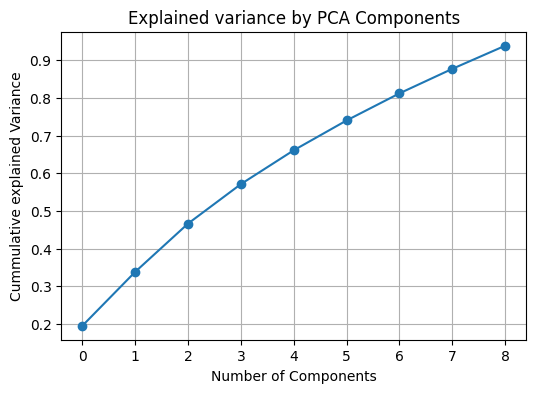

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), marker = 'o')
plt.xlabel("Number of Components")
plt.ylabel("Cummulative explained Variance")
plt.title("Explained variance by PCA Components")
plt.grid(True)
plt.show()

Based on the above chart, we can select the no' of pc's we want

#### **Scatter plot of first 2 principal components**

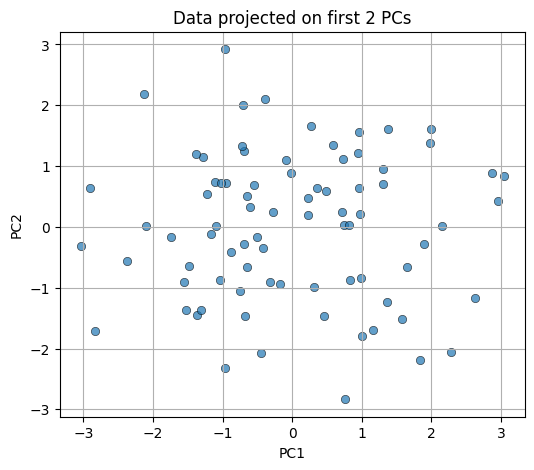

In [39]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=x_train_pca_1[:, 0], y=x_train_pca_1[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.title("Data projected on first 2 PCs")
plt.grid(True)
plt.show()

We can observe that, there is no correlation between the projected components